### Max Speedup / Scalability vs Collection Size

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# load coll_size vs sequential_time 
coll_size_vs_tseq_df = pd.read_csv('../Statistics/collection_size_vs_sequential_time.csv')
coll_size_vs_tseq_df.head()

coll_sizes = coll_size_vs_tseq_df['collection_size']
sequential_times = coll_size_vs_tseq_df['sequential_time']
coll_size_vs_tseq_df.head()

,collection_size,sequential_time
0,100,100042
1,200,200058
2,400,400174
3,800,800495
4,1600,1600881


In [3]:
# load completion_time vs nw for each coll size
tc_vs_nw_df_list_coll = []
for coll_size in coll_sizes:
    df = pd.read_csv('../Statistics/CollSize/completion_time_vs_nw_coll_size_' + 
                     str(coll_size) + '.csv')
    tc_vs_nw_df_list_coll.append(df)

nw = tc_vs_nw_df_list_coll[0]['nw']
tc_vs_nw_df_list_coll[0].head()

,nw,completion_time
0,1,106437
1,2,59636
2,3,36772
3,4,27936
4,5,23813


In [4]:
max_speedups = []
nw_max_speedups = []
max_scalabilities = []

speedups_list = []

for i in range(len(tc_vs_nw_df_list_coll)):
    tseq = sequential_times[i]
    tc_list = tc_vs_nw_df_list_coll[i]['completion_time']
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    nw_max_speedups.append(np.argmax(speedup)+1)
    max_speedups.append(np.max(speedup))
    max_scalabilities.append(np.max(scalability))
    
    speedups_list.append(speedup)

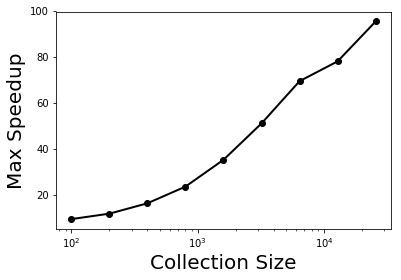

In [23]:
plt.plot(coll_sizes, max_speedups, 'o-', color='black', label='max speedup', linewidth=2)
#plt.plot(coll_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.xscale('log')
plt.ylabel('Max Speedup', fontsize=20)
plt.xlabel('Collection Size', fontsize=20)
plt.show()

In [18]:
print('max speedup', round(max(max_speedups),2))
print('at coll size', coll_sizes[np.argmax(max_speedups)])

max speedup 95.48
at coll size 25600


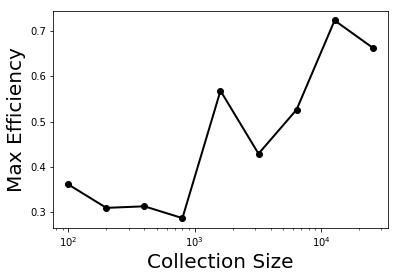

In [6]:
# max efficiency
max_efficiencies = [ float(sp)/nw for nw, sp in zip(nw_max_speedups, max_speedups)]
plt.plot(coll_sizes, max_efficiencies, '-o', color='black', linewidth=2)
plt.ylabel('Max Efficiency', fontsize=20)
plt.xlabel('Collection Size', fontsize=20)
plt.xscale('log')
plt.show()

In [19]:
print('max efficiency', round(max(max_efficiencies),2))
print('at coll size', coll_sizes[np.argmax(max_efficiencies)])

max efficiency 0.72
at coll size 12800


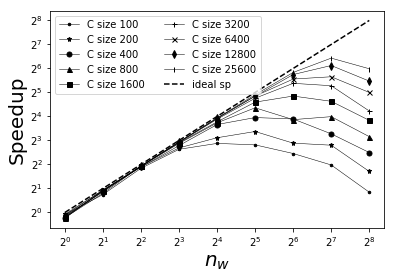

In [20]:
index = list(np.array([1,2,4,8,16,32,64,128,256]) - 1)
# all speedups for each collection size vs nw
linestyles = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-.']
markers = ['.', '*', 'o','^', 's', '+', 'x', 'd', '|', '_']

for coll_size, sp, ls, ms in zip(coll_sizes, speedups_list, linestyles, markers):
    nw = np.array(index)+1
    sp = [sp[i] for i in index]
    plt.plot(nw, sp, label='C size ' + str(coll_size), 
             linestyle=ls, marker=ms, color='black', linewidth=0.5, markersize=5)

plt.plot(nw, nw, label='ideal sp', linestyle='--', color='k')
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.legend(loc='upper left', ncol=2, fancybox=True)
plt.show()